## Machine Learning Algorithms applied to Divorce Data

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
# read data from csv file into pandas data frame
df = pd.read_csv("tree_feature_data.csv")
df.head()

,Atr17,Atr36,Atr37,Atr38,Atr40,Atr41,Class
0,0,1,2,1,3,2,1
1,4,2,3,4,4,2,1
2,3,1,2,1,3,3,1
3,3,1,3,3,4,2,1
4,1,0,0,0,1,0,1


## K Nearest Neighbors

In [3]:
# splitting data into arrays for X and y
data = df.values
X = data[:, 0:6]
y = data[:, 6]

In [4]:
# Set up to train, test and split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [6]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.953
k: 3, Train/Test Score: 0.984/0.953
k: 5, Train/Test Score: 0.992/0.953
k: 7, Train/Test Score: 0.976/0.953
k: 9, Train/Test Score: 0.976/0.953
k: 11, Train/Test Score: 0.976/0.953
k: 13, Train/Test Score: 0.976/0.953
k: 15, Train/Test Score: 0.976/0.953
k: 17, Train/Test Score: 0.976/0.953
k: 19, Train/Test Score: 0.976/0.953


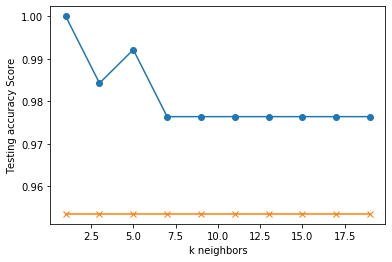

In [7]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
# k: 13 is the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.953


In [9]:
target = df["Class"]
target_names = ["Married", "Divorced"]

In [10]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

     Married       0.92      1.00      0.96        22
    Divorced       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



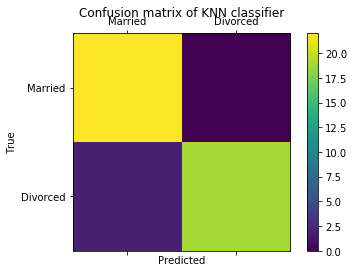

In [13]:
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of KNN classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  22
False Positives:  0
False Negatives:  2
True Positives:  19
